# Examination of Discount Curve Interpolation Schemes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils.date import Date
from financepy.market.curves.interpolator import interpolate, InterpTypes
from financepy.market.curves.discount_curve import DiscountCurve

####################################################################
# FINANCEPY BETA Version 0.250 - This build:  23 Sep 2022 at 18:50 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



In [3]:
tValues = np.array([0.01, 3.0, 5.0, 10.0]) 
rValues = np.array([0.04, 0.07, 0.08, 0.09])
df_values = np.exp(-tValues*rValues)
tInterpValues = np.linspace(0.01, 12.0, 200)

In [4]:
print(tValues)
print(rValues)
print(df_values)

[ 0.01  3.    5.   10.  ]
[0.04 0.07 0.08 0.09]
[0.99960008 0.81058425 0.67032005 0.40656966]


In [5]:
curve_date = Date(3, 1, 2019)
dates = curve_date.add_years(tValues)
interpDates = curve_date.add_years(tInterpValues)

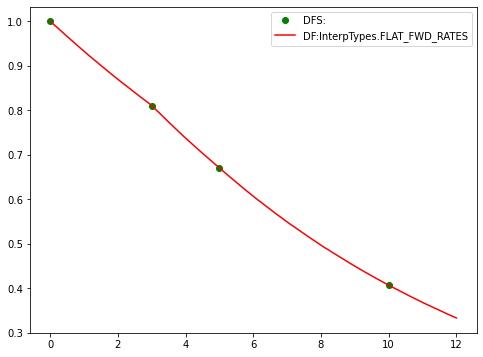

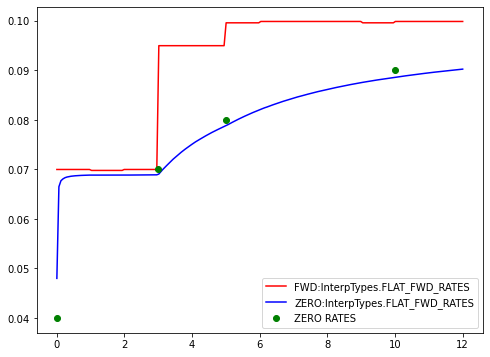

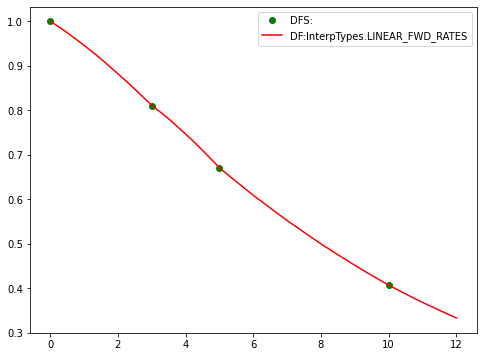

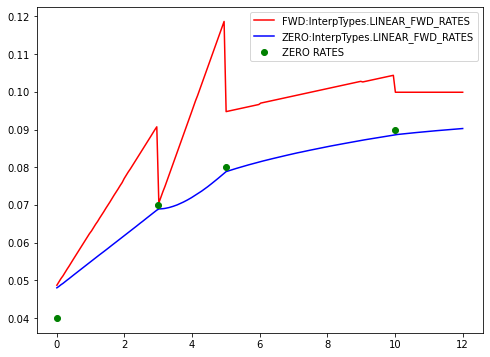

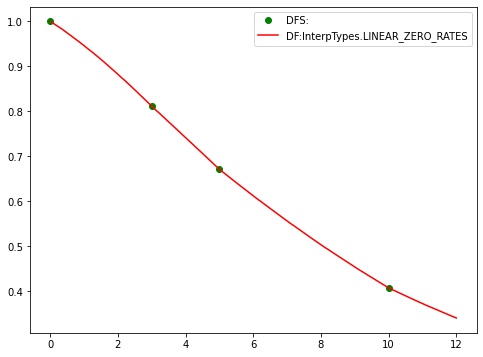

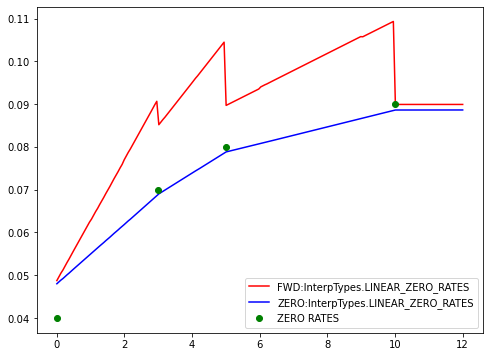

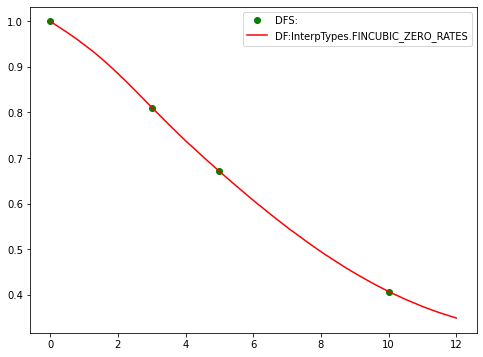

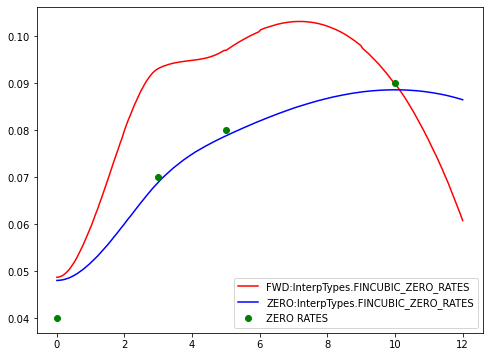

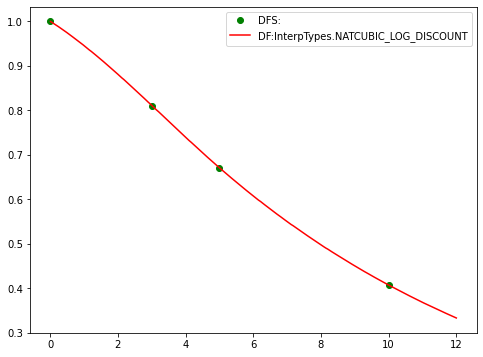

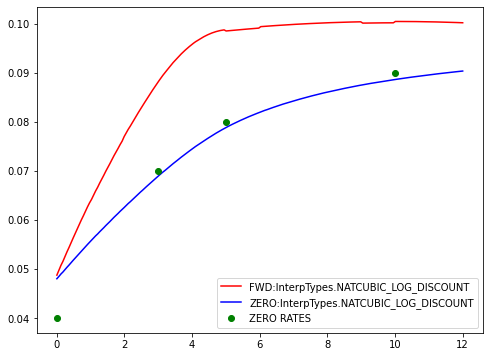

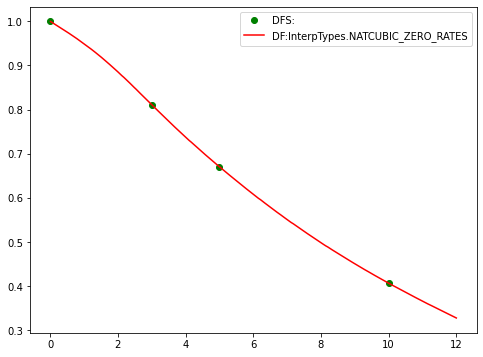

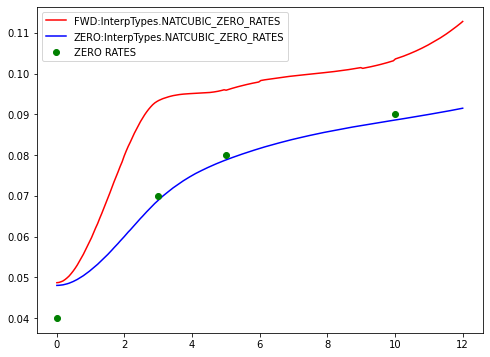

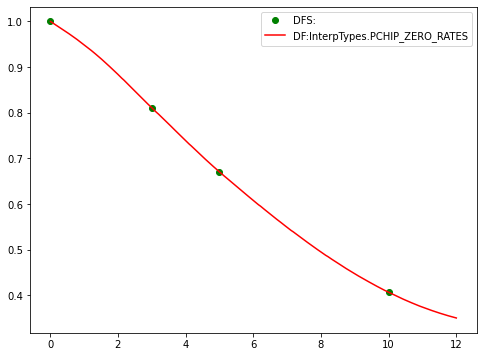

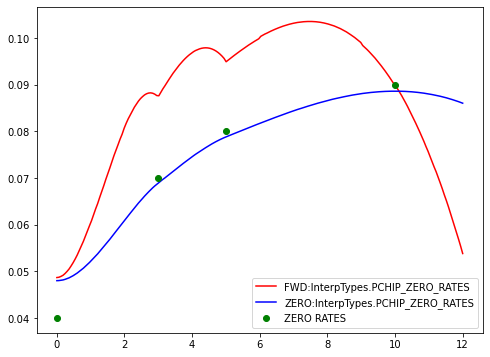

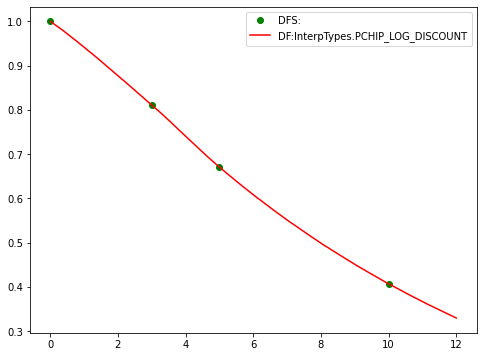

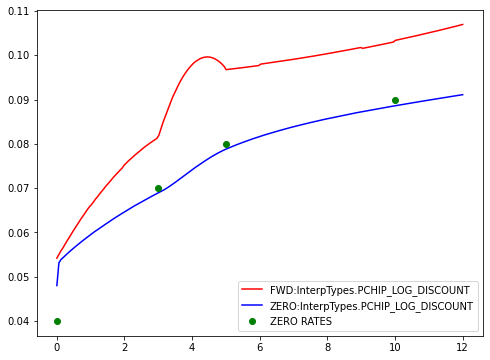

In [6]:
for method in InterpTypes:

    discount_curve = DiscountCurve(curve_date, dates, df_values, method)

    dfInterpValues = discount_curve.df(interpDates)
    fwdInterpValues = discount_curve.fwd(interpDates)
    zeroInterpValues = discount_curve.zero_rate(interpDates)
    
    plt.figure(figsize=(8, 6))
    plt.plot(tValues, df_values, 'o', color='g', label="DFS:")
    plt.plot(tInterpValues, dfInterpValues, color='r', label="DF:" + str(method))
    plt.legend()

    plt.figure(figsize=(8, 6))
    plt.plot(tInterpValues, fwdInterpValues, color='r', label="FWD:" + str(method))
    plt.plot(tInterpValues, zeroInterpValues, color='b', label="ZERO:" + str(method))
    plt.plot(tValues, rValues, 'o', color='g',  label="ZERO RATES")
    plt.legend()

Copyright (c) 2020 Dominic O'Kane